In [1]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer

# 加载模型和分词器
dir = '/content/drive/MyDrive/Bert_Finetune/Bert fine-tuned on a subset of sentiment140/model_save'
model = BertForSequenceClassification.from_pretrained(dir)
tokenizer = BertTokenizer.from_pretrained(dir)
class_names = ['negative','postive']

In [79]:
import my_lime
import myTextExplainer
import importlib
importlib.reload(my_lime)
importlib.reload(myTextExplainer)

<module 'myTextExplainer' from '/content/myTextExplainer.py'>

In [80]:
import numpy as np
import torch
import torch.nn.functional as F
from myTextExplainer import *

def predictor(texts):
  outputs = model(**tokenizer(texts, return_tensors="pt", padding=True))
  probas = F.softmax(outputs.logits).detach().numpy()
  return probas

string = "I really want to apply for a au pair job, but I'm so fucking scared of change, that I keep overthinking everything."
explainer = TextExplainer()

# explainer.explain_string_by_mylime(string, predictor, num_features=10, num_samples=1000)

# explainer.show_as_list()

In [81]:
predictor(string)

<ipython-input-80-6757306c8397>:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probas = F.softmax(outputs.logits).detach().numpy()


array([[0.996393  , 0.00360696]], dtype=float32)

In [82]:
# explainer.output

<ipython-input-80-6757306c8397>:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probas = F.softmax(outputs.logits).detach().numpy()


[('I', 0.12445547055303158), ('want', 0.09101413982144432), ('m', 0.08313210381148775), ('but', 0.07642415470090339), ('to', 0.07120108354498571), ('really', 0.06766559824067304), ('scared', 0.06510455102515172), ('overthinking', 0.05360429077084802), ('job', 0.05230474032859893), ('pair', 0.04843654986989936)]


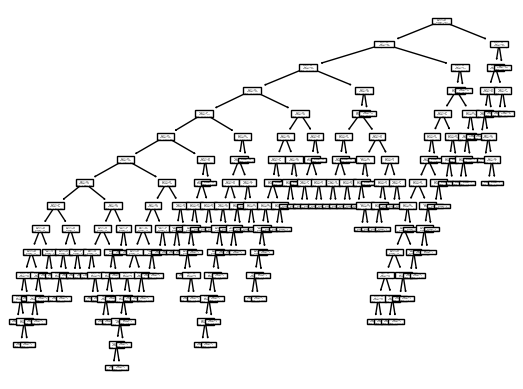

In [83]:
explainer.explain_string_by_treelime(string, predictor, num_features = 10, num_samples=1000)

explainer.show_tree()

In [84]:
explainer.importances

[('I', 0.12445547055303158),
 ('want', 0.09101413982144432),
 ('m', 0.08313210381148775),
 ('but', 0.07642415470090339),
 ('to', 0.07120108354498571),
 ('really', 0.06766559824067304),
 ('scared', 0.06510455102515172),
 ('overthinking', 0.05360429077084802),
 ('job', 0.05230474032859893),
 ('pair', 0.04843654986989936)]